# Lab 1 - The Basics

## Introduction
This lab is an introduction to the world of Python in structural engineering! As with engineering, there are a multitude of ways to go about solving a problem, and my goal is to show you a few ways you can approach these problems. The best way to learn program is to program something poorly, reflect, and improve using new knowledge. Python is designed to be concise and intuitive, so if you look at your code and it isn't, you likely have opportunities to improve

## Before you begin
Prior to beginning these labs, you should have a basic understanding of Python syntax. There are countless resources online (including this one) catering to every teaching style. Three are also presented below.

### The Python Tutorial
https://docs.python.org/3/tutorial/index.html
This is the official tutorial. Chapters 3-9 have plenty of information you will find useful in your early programming days and even more information that you won't be able to understand.

### PEP-8 Style Guide
https://pep8.org/
Taking the time to format your code properly will pay dividends later on. The PEP-8 Style-Guide is a widely agreed upon tradition of formatting that makes for easily readable code for yourself and others. Learning to code to a style-guide is essential if you want to contribute to world-changing projects in the future, such as OpenSees or working for Ashraf.

### The ARCE Python Manual
https://digitalcommons.calpoly.edu/arcesp/201/
Written by Cal Poly graduates, this manual is a condensed documentation for Python catered specifically to Cal Poly ARCE students. Use it, share it, add to it!

## Importing Libraries
Libraries are pre-built collections of code that you can bring into your own projects. Spyder comes bundled with some of the essentials, but there is a wide world of libraries you can try later on. I will introduce a number of lines to make your life easier, especially with plotting and eventually organizing your data for later programming labs. Traditionally, we import the libraries alphabetically.

`import libraryname as nickname`

The nickname can be whatever you'd like, so long as it doesn't conflict with anything else. Libraries are collections of functions, which are mini-scripts that can return an output given a set of inputs. Suppose I have a library called `structuraldesigner` and it has a number of functions like `design_column()` and `design_beam()`. 

```
import structuraldesigner as sd

sd.design_beam(loads, load_combos)
```
`sd` is our nickname of the 'toolbox' and `design_beam` is the function. Everything within the `()` is the inputs, separated by commas.

In [5]:
# Import libraries
import matplotlib.pyplot as plt # pyplot is essentially matlab's plotting engine
import numpy as np # numpy is for doing powerful mathematics
# numpy is the name of the library, np is our nickname (optional)

Wait! Why is the `matplotlib.pyplot` named so weird?? It can be helpful to imagine a library as a folder on your desktop, with a bunch of folders inside. 

```
Library
>>>method1
>>>method2
>>>sub_library
>>>>>>sub_lib_method1()
```
Every time we go one layer deeper in the folder, we use a `.`

If we wanted to access `sub_lib_method1()`, we'd have to write `Library.sub_library.sub_lib_method1()`

MatPlotLib is a library for plotting that mirrors the functionality of MatLab's plotting functions. It has a *ridiculous* number of functions that need to be organized into sub_libraries--pyplot being one of them. Below is a snippet of how MatPlotLib is organized

```
MatPlotLib
>>>pyplot
>>>>>>plot()
```
If we didn't use a nickname for matplotlib.pyplot, our code would look like `matplotlib.pyplot.plot()`. Ridiculous!

Later you'll find you can actually create your own libraries with convenient, repetitive code that can be imported into all of your prorams.

## Defining Variables
NAME YOUR VARIABLES DESCRIPTIVELY. When we sent people to the moon, we had 4KB of memory. Having this page open in your browser is likely taking up hundreds of times more memory. Accordingly, there is no need to be cryptic with your variable names. 

`var_name = value` Tradition is to use all lowercase for your variables, separating words with underscores. Following this convention can be helpful when sifting through different variables and classes later on in your ARCE career as all of those have differing conventions.

The link below is *the* style guide for Python. It is pretty quick to flip through--don't worry if it doesn't all make sense yet!

https://pep8.org/

In [6]:
# define problem parameters: A 240 unit length hollow rectangular beam with three different distributed load cases
length = 240 # length
dist_load_1 = 83.33 # force / length
dist_load_2 = 166.66 # force / length
dist_load_3 = 250 # force / length

# define section dimensions
thickness = 2 # length
outer_width = 12 # length
outer_height = 16 # length
inner_height = outer_height - 2 * thickness # length
inner_width = outer_width - 2 * thickness # length

# define material properties
mod_E = 29000000 # force/length**2

As you can see, we can either define variables in terms of constants or in terms of functions of other variables. We use a *single* `=` to assign variables. We can overrite our variable assignments later on in the script with the same syntax.

In [7]:
# Calculate the section properties
area_net = outer_height * outer_width - inner_height * inner_width # length**2
moment_inertia = (outer_width * outer_height**3 / 12) - (inner_width * inner_height**3 / 12) # length**4

## Viewing Calculation Outputs: f-strings
An essential part of debugging is examining our outputs. The `print()` function is your best friend, and we can make it descriptive by using f-strings. The `print()` function only accepts `String` types--we're familiar with `String`s as defined by `"text inside quotation marks"`, but how do we convert our numeric outputs?

In [8]:
# Putting our variable name in quotation marks won't work
print("area_net")

area_net


In [9]:
# Concatenate (attaching) our variable to a string using addition will give an TypeError
print("area_net = " + area_net)

<class 'TypeError'>: can only concatenate str (not "int") to str

In [10]:
# We can convert our outputs into strings first
print("area_net = " + str(area_net))

area_net = 96


In [11]:
# The most elegant solution is with the f-string
print(f"area_net: {area_net}\nmoment_inertia: {moment_inertia}")

area_net: 96
moment_inertia: 2944.0


We were able to print two nicely formatted outputs wiithout having to cast new types to our variables using f-strings.

```f"The result is {number}\nThe second result is {number2}"```

Every f-string starts with an `f` before the quotation mark. Any string content (words) is typed as usual between the quotation marks, and content defined by variables goes between curly brackets `{}`. You can evaluate expressions, call functions, and even format your text to a variety of formats using the f-string syntax. Explore online resources to find out more! 

https://realpython.com/python-f-strings/#doing-string-interpolation-with-f-strings-in-python

*note: `\n` can be used to create a new line in a string*

## Evaluating expressions over a domain
### Generating the Range

For some problems, the best way to understand the behavior across the entire section is to evaluate it numerically. This means segmenting the domain of your function into many tiny pieces and evaluating your function at these points. A useful way to create this domain is to use `numpy`'s `arange()` function.

From the official documentation (https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange)

Let's assume we already `import numpy as np`

`np.arange(start, stop, step)` 

The `start` is the first value in your range array, and the range goes up to **but does not include** `stop`. The `step` is the size of steps between values. Be careful with your aranges! It is easy to create an array of millions of values by using a tiny `step`. Choose a step such that it captures the behavior of your function (especially maxima, minima, and zeros) using the fewest number of steps appropriate for your end-use.

In [12]:
# First, create the points at which we'll check the deflection
x_vals = np.arange(0,241,1) # note that the stop is 241 because arange is not end-inclusive
print(x_vals)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240]


### Checking array values
We can use the below format to pull any individual number or range of numbers in an array

`array_name[index]`

Remember, Python starts indexing at 0!

In [13]:
# To see the first value, check the 0th item in the array:
print(x_vals[0])

0


In [14]:
# To see the last value, we check the -1th item in the array:
print(x_vals[-1])

240


In [15]:
# To see a slice of the values:
print(f"From index 2 up to 12: {x_vals[2:12]}") # like arange()'s end parameter, the second index in the slice is non-inclusive!
print(f"After index 230: {x_vals[230:]}") # leaving off the second index will take all values after the first index
print(f"Up to index 12: {x_vals[:12]}") # the inverse is true leaving the first index off--note the 12th index item is missing!
print((f"Every other value from index 2 up to 12: {x_vals[2:12:2]}")) # you can even use the first, last (non-inclusive), step notation to slice!

From index 2 up to 12: [ 2  3  4  5  6  7  8  9 10 11]
After index 230: [230 231 232 233 234 235 236 237 238 239 240]
Up to index 12: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Every other value from index 2 up to 12: [ 2  4  6  8 10]


### Evaluating the Expression
Once we have our range, we need to *iterate* over our function. I will outline three ways to do this, but there are many more, including some we'll use in the future!

In [16]:
# Using a for-loop

# Create an empty storage array for your outputs
defl_y1 = []

# for loops take each value in the input array and runs the indented code using the iterator
# for [iterator] in [input array]
for x_val in x_vals:
    # append() attaches the value from inside the parenthesis to the end of the array before the .
    defl_y1.append((dist_load_1 * x_val / (24 * mod_E * moment_inertia)) * (length**3 - 2 * length * x_val**2 + x_val**3))
print(defl_y1[120])

0.042164730134932535


In [17]:
# Using a while-loop

# Create a storage array of zeros
defl_y1 = np.zeros(len(x_vals)) # np.zeros (length of array -- or shape, but we'll tackle that later)

# Select the starting index
index = 0
while index < len(x_vals):
    # Change the value at the iterator index
    defl_y1[index] = (dist_load_1 * x_vals[index] / (24 * mod_E * moment_inertia)) * (length**3 - 2 * length * x_vals[index]**2 + x_vals[index]**3)
    # ALWAYS REMEMBER TO INCREMENT YOUR ITERATOR OR YOU WILL ENTER A NEVER-ENDING LOOP AND NEED TO KILL THE KERNEL
    index += 1
print(defl_y1[120])

0.042164730134932535


In [18]:
# Using a lambda function. Lambda functions are mini functions with inputs and outputs that evaluate a single expression
# func_name = lambda input1, input2... : function(input1, input2)
defl_eqn = lambda x_val, dist_load : (dist_load * x_val / (24 * mod_E * moment_inertia)) * (length**3 - 2 * length * x_val**2 + x_val**3)
print(defl_eqn(120, dist_load_1))

# You could then use your lambda function in a for or while-loop! An exercise for the reader...

0.042164730134932535


## Plot the results!
There are a number of different plotting libraries available to use--much of our field is built on MatLab and `matplotlib` is a powerful library that implements MatLab's plotting capabilities. However, it has a very particular syntax. Wrapper libraries, such as `seaborn` and `plotnine`, use `matplotib` as a backend and provide easy-to-use commands to build elegant plots quickly. Advanced users can start storing data in DataFrames and take advantage of `pandas`' robust data organization and plotting functions--excellent practice for later labs.
### matplotlib

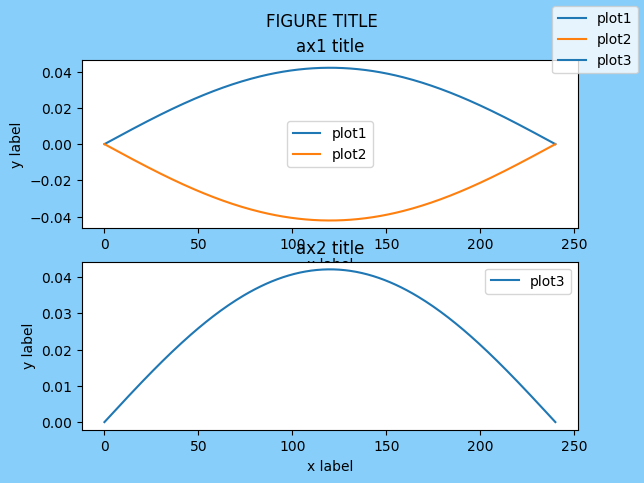

In [56]:
# Plot a single graph with two different data series
import matplotlib.pyplot as plt

# fig describes the whole figure, which can contain multiple plots
# ax describes the individual plots--you can have multiple of these
fig, (ax1, ax2) = plt.subplots(2,1) # create a 2 high, 1 fig with 2 plots
fig.set_facecolor('lightskyblue') # set the background of the figure
fig.suptitle('FIGURE TITLE') # give a overall title

# note: the label doesn't show until you create a legend object
# labels must also be created before the legend is called
# You can plot multiple graphs on the same ax by calling that ax multiple times
ax1.plot(x_vals, defl_y1, label='plot1') # plot x, y with a label plot1
ax1.plot(x_vals, -1*defl_y1, label='plot2') # ... with a label plot2
ax1.set_xlabel('x label') # x axis label
ax1.set_ylabel('y label') # y axis label
ax1.set_title('ax1 title') # first plot label
ax1.legend() # this one is inside the plot border 

ax2.plot(x_vals, defl_y1, label='plot3') 
ax2.set_xlabel('x label')
ax2.set_ylabel('y label')
ax2.set_title('ax2 title')
ax2.legend()

fig.legend() # this one is outside the figure

plt.show() # you need this at the very end to show your plot!


### seaborn
Additional content to come